In [1]:
#PCA principle component analysis
#import libraries
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
#generate an array of 100 gene names
genes=['gene'+ str(i) for i in range(1,101)]
#'gene1' through 'gene100'

In [6]:
#create arraies of sample names
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range (1,6)]

In [8]:
wt

['wt1', 'wt2', 'wt3', 'wt4', 'wt5']

In [10]:
data=pd.DataFrame(columns=[*wt, *ko], index=genes)
#the 'stars' unpack the "wt" and "ko" arrays so that the column names are single array
#like wt1,wt2...

In [11]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [14]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  244  238  283  272  236  930  940  952  891  948
gene2  394  373  389  394  351  249  231  217  217  229
gene3  459  436  460  445  431  795  845  832  867  870
gene4  161  156  172  174  157  547  577  566  522  538
gene5  508  494  490  479  483  622  661  644  661  632


In [13]:
print(data.shape)

(100, 10)


In [16]:
#before we do PCA we have to center and scale the data
#after centering, the average value for each gene will be 0
#after scaling the standard deviation for the values for each gene will be 1
#passing the transpose of data
#the scale function expects the samples to be rows instead of columns
#other way to do this is: StandardScaler().fit_transform(data.T)
#in R use prcomp
scaled_data=preprocessing.scale(data.T)

In [17]:
#Notes:
#in sklearn variation is calculated as:
#(measurements -mean)^2 / (the number of measurements)
#in R using scale() or prcomp() variation is calculatd as:
#(measurements -mean)^2 / (the number of measurements -1)
#this method results in larger unbiased estimates of the variation
#these differences do not effect the PCA analysis
#the loading scores and the amount of variation per principal component will be the same

In [18]:
#create a PCA object
pca=PCA()

In [19]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca_data=pca.transform(scaled_data)
#generate coordinates for a PCA graph based on the loading scores and the scaled data

In [21]:
#fro graph
#calculate the percentage of variation that each principal component accounts for
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)

In [23]:
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

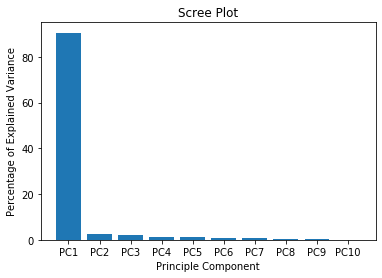

In [24]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

In [26]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
#to draw a PCA plot fist put the new coordinates into a matrix 
#rows have sample labels and columns have PC labels

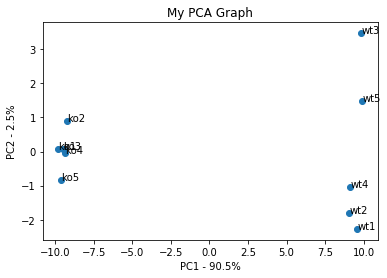

In [30]:
#only use PC1 and PC2 to draw
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

plt.show()

In [31]:
#lastly, let's look ar the loading scores for PC1 to determine which genes had the 
#largest influence on separating the two clusters along the x-axis
#creating a pandas "Series" object with the loading scores in PC1
#princple component are zero-indexed, so PC1=0
loading_scores=pd.Series(pca.components_[0], index=genes)

In [32]:
#sort the loading scores based on their magnitude (absolute value)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

In [33]:
#getting the names of the top 10 indexed (which are the gene names)
top_10_genes=sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene78   -0.105107
gene32   -0.105033
gene46   -0.105010
gene37    0.104998
gene87    0.104998
gene82    0.104998
gene83   -0.104996
gene80   -0.104994
gene70   -0.104991
gene64    0.104983
dtype: float64
